<a href="https://colab.research.google.com/github/Daimond92/sentimind-api/blob/feature%2Fds-model-training/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analyst (EDA) - Entender los datos
## Amazon Reviews Multi-ES

A continuación, se realiza un análisis exploratorio del dataset Amazon Reviews Multi-ES, con el objetivo de entender la estructura de los datos, la distribución de las clases y las características generales de las reseñas antes de entrenar un modelo de análisis de sentimientos.





#Importar PANDAS

In [9]:
import pandas as pd

#Importar Matplotlib

In [18]:
import matplotlib.pyplot as plt

# Cargar el dataset

In [10]:
df = pd.read_json("train.jsonl", lines=True)

# Ver las primeras Columnas

In [11]:
df.columns

Index(['id', 'text', 'label', 'label_text'], dtype='object')

# Ver las primeras filas

In [8]:
df.head()

,id,text,label,label_text
0,es_0491108,Nada bueno se me fue ka pantalla en menos de 8...,0,0
1,es_0869872,"Horrible, nos tuvimos que comprar otro porque ...",0,0
2,es_0811721,Te obligan a comprar dos unidades y te llega s...,0,0
3,es_0359921,"No entro en descalificar al vendedor, solo pue...",0,0
4,es_0068940,Llega tarde y co la talla equivocada,0,0


# Tamaño del dataset

In [5]:
df.shape

(200000, 4)

# Información general de las columnas

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          200000 non-null  object
 1   text        200000 non-null  object
 2   label       200000 non-null  int64 
 3   label_text  200000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 6.1+ MB


#Muestra de trabajo de los primeros datos (5.000 registros)

In [14]:
df_sample = df.sample(n=5000, random_state=42)
df_sample.shape

(5000, 4)

# Distribución General

In [13]:
df['label'].value_counts()

,count
label,
0,40000
1,40000
2,40000
3,40000
4,40000


## **Muestra de trabajo (5.000 registros)**

In [15]:
df_sample = df.sample(n=5000, random_state=42)
df_sample.shape

(5000, 4)

### Distribución de clases en la muestra

In [16]:
df_sample['label'].value_counts().sort_index()

,count
label,
0,1007
1,982
2,1003
3,987
4,1021


### Grafica

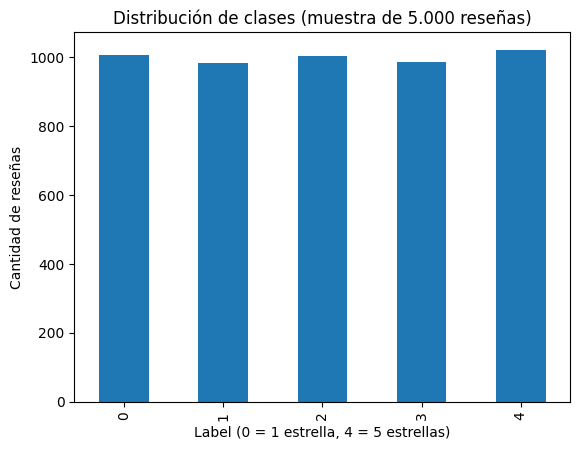

In [20]:
df_sample['label'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de clases (muestra de 5.000 reseñas)')
plt.xlabel('Label (0 = 1 estrella, 4 = 5 estrellas)')
plt.ylabel('Cantidad de reseñas')
plt.show()

### Análisis de longitud de las reseñas

In [21]:
# Calculamos la longitud de cada reseña en número de palabras
df_sample['text_length'] = df_sample['text'].apply(lambda x: len(x.split()))

# Revisamos estadísticas básicas
df_sample['text_length'].describe()

,text_length
count,5000.000000
mean,27.735600
std,23.469432
min,2.000000
25%,12.000000
50%,22.000000
75%,34.000000
max,278.000000


### Histograma de longitud de textos

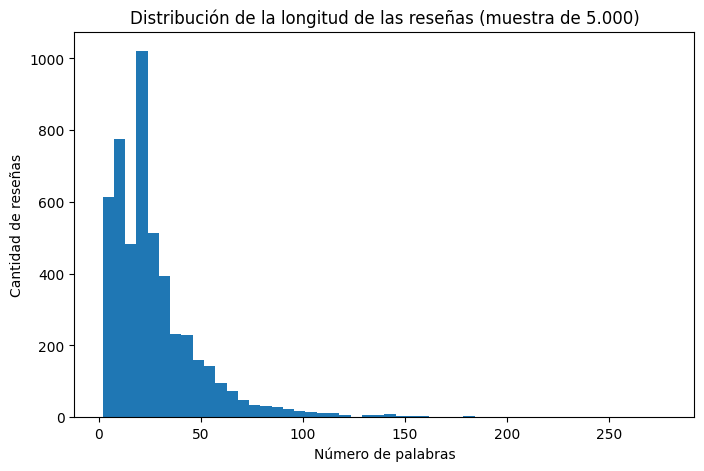

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_sample['text_length'], bins=50)
plt.title('Distribución de la longitud de las reseñas (muestra de 5.000)')
plt.xlabel('Número de palabras')
plt.ylabel('Cantidad de reseñas')
plt.show()

#CONCLUSION

A partir de una muestra de 5.000 reseñas, se observa que los textos son mayoritariamente cortos a medianos, con un promedio de aproximadamente 28 palabras por reseña. La reseña más corta contiene 2 palabras, mientras que la más extensa alcanza las 278 palabras.
Al analizar la distribución, se evidencia que el 25% de las reseñas tiene 12 palabras o menos, el 50% (mediana) no supera las 22 palabras y el 75% cuenta con un máximo de 34 palabras, lo que indica que la mayoría de los comentarios son relativamente breves.
